In [48]:
# Exploration of Features vs Time

import pandas_gbq
import pydata_google_auth
import pandas as pd


SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',
]

credentials = pydata_google_auth.get_user_credentials(SCOPES, auth_local_webserver=True)

In [75]:
# User Activity

# user_list = ["gokul-visa-crio-users", "prashanth-visa-crio-users", "ujwala-visa-crio-users", "kaushal-visa-crio-users", "kurmadasu-visa-crio-users", "swarnalaxmi-visa-crio-users"]
user_dict = {
    "gokul-visa-crio-users": "leader",
    "prashanth-visa-crio-users": "leader",
    "ujwala-visa-crio-users": "average",
    "kaushal-visa-crio-users": "average",
    "kurmadasu-visa-crio-users": "lagger",
    "swarnalaxmi-visa-crio-users": "lagger"
}
# user_list = ["anmol-visa-crio-users"]

activity_sql = """
select start_time_in_ms, end_time_in_ms, user_id from crio_database.user_crio_time as uct
where true
and user_id LIKE "%visa-crio-users%"
and end_time_in_ms != 0
"""

user_activity = pandas_gbq.read_gbq(
    activity_sql,
    project_id='crio-vpn-prod',
    credentials=credentials,
)

user_activity["user_id"].unique()

# filter
user_activity = (user_activity.loc[user_activity['user_id'].isin(user_dict.keys())])
user_activity

start_time_in_ms  end_time_in_ms                      user_id
0       1565019198572   1565022533966    prashanth-visa-crio-users
1       1565004454959   1565006129197    prashanth-visa-crio-users
2       1564744285178   1564745490937    prashanth-visa-crio-users
6       1564658619463   1564659224087        gokul-visa-crio-users
7       1564734932335   1564740360487        gokul-visa-crio-users
..                ...             ...                          ...
826     1564489715473   1564490319043       ujwala-visa-crio-users
831     1564504076683   1564519135525    prashanth-visa-crio-users
841     1564494839933   1564506840355  swarnalaxmi-visa-crio-users
842     1565070558885   1565076713704    prashanth-visa-crio-users
843     1565067464947   1565067963876    prashanth-visa-crio-users

[115 rows x 3 columns]

In [76]:
# User Module Completion

module_completion_sql = """
select
user_id, module_id_persisted_module_identifier, module_start_time_in_ms, module_end_time_in_ms
from crio_database.user_module_progress as ump
where true
and user_id LIKE "%visa-crio-users%"
and ump.module_status = "MODULE_STATUS_COMPLETED"
"""

user_module_completion = pandas_gbq.read_gbq(
    module_completion_sql,
    project_id='crio-vpn-prod',
    credentials=credentials,
)

#filter 
user_module_completion = (user_module_completion.loc[user_module_completion['user_id'].isin(user_dict.keys())])
user_module_completion['module_end_time_in_ms'] = pd.to_datetime(user_module_completion['module_end_time_in_ms'],unit='ms')

user_module_completion

user_id module_id_persisted_module_identifier  \
4      prashanth-visa-crio-users         ME_QRIDE_MODULE_SERIALIZATION   
6    swarnalaxmi-visa-crio-users         ME_QRIDE_MODULE_SERIALIZATION   
13     kurmadasu-visa-crio-users         ME_QRIDE_MODULE_SERIALIZATION   
14        ujwala-visa-crio-users         ME_QRIDE_MODULE_SERIALIZATION   
16         gokul-visa-crio-users         ME_QRIDE_MODULE_SERIALIZATION   
24       kaushal-visa-crio-users         ME_QRIDE_MODULE_SERIALIZATION   
63         gokul-visa-crio-users                   ME_QRIDE_MODULE_SQL   
64        ujwala-visa-crio-users                   ME_QRIDE_MODULE_SQL   
70     kurmadasu-visa-crio-users                   ME_QRIDE_MODULE_SQL   
71       kaushal-visa-crio-users                   ME_QRIDE_MODULE_SQL   
72     prashanth-visa-crio-users                   ME_QRIDE_MODULE_SQL   
84   swarnalaxmi-visa-crio-users                   ME_QRIDE_MODULE_SQL   
92       kaushal-visa-crio-users               ME_QRIDE_MODULE_RESTAPI   
99     prashanth-visa-crio-users               ME_QRIDE_MODULE_RESTAPI   
100    kurmadasu-visa-crio-users               ME_QRIDE_MODULE_RESTAPI   
106  swarnalaxmi-visa-crio-users               ME_QRIDE_MODULE_RESTAPI   
128        gokul-visa-crio-users               ME_QRIDE_MODULE_RESTAPI   
134       ujwala-visa-crio-users               ME_QRIDE_MODULE_RESTAPI   
138        gokul-visa-crio-users          ME_QRIDE_MODULE_SCHEDULETRIP   
142      kaushal-visa-crio-users          ME_QRIDE_MODULE_SCHEDULETRIP   
178  swarnalaxmi-visa-crio-users          ME_QRIDE_MODULE_SCHEDULETRIP   
184    prashanth-visa-crio-users         ME_QRIDE_MODULE_APICOMPLETION   
190    prashanth-visa-crio-users           ME_QRIDE_MODULE_PERFORMANCE   
200       ujwala-visa-crio-users          ME_QRIDE_MODULE_SCHEDULETRIP   
201  swarnalaxmi-visa-crio-users           ME_QRIDE_MODULE_PERFORMANCE   
202      kaushal-visa-crio-users           ME_QRIDE_MODULE_PERFORMANCE   
211    prashanth-visa-crio-users          ME_QRIDE_MODULE_SCHEDULETRIP   
212       ujwala-visa-crio-users         ME_QRIDE_MODULE_APICOMPLETION   
214        gokul-visa-crio-users           ME_QRIDE_MODULE_PERFORMANCE   
218  swarnalaxmi-visa-crio-users         ME_QRIDE_MODULE_APICOMPLETION   
233    kurmadasu-visa-crio-users          ME_QRIDE_MODULE_SCHEDULETRIP   
236    kurmadasu-visa-crio-users         ME_QRIDE_MODULE_APICOMPLETION   
239    kurmadasu-visa-crio-users           ME_QRIDE_MODULE_PERFORMANCE   
241       ujwala-visa-crio-users           ME_QRIDE_MODULE_PERFORMANCE   
245        gokul-visa-crio-users         ME_QRIDE_MODULE_APICOMPLETION   
269      kaushal-visa-crio-users         ME_QRIDE_MODULE_APICOMPLETION   
285        gokul-visa-crio-users                 ME_QRIDE_MODULE_DEBUG   
295    prashanth-visa-crio-users                 ME_QRIDE_MODULE_DEBUG   
302       ujwala-visa-crio-users                 ME_QRIDE_MODULE_DEBUG   
303    kurmadasu-visa-crio-users                 ME_QRIDE_MODULE_DEBUG   
305      kaushal-visa-crio-users                 ME_QRIDE_MODULE_DEBUG   
312  swarnalaxmi-visa-crio-users                 ME_QRIDE_MODULE_DEBUG   

     module_start_time_in_ms   module_end_time_in_ms  
4              1564372626764 2019-07-29 10:07:11.655  
6              1564372090490 2019-07-29 08:55:03.391  
13             1564372062071 2019-07-29 08:51:43.354  
14             1564372330038 2019-07-29 09:20:18.627  
16             1564372254165 2019-07-29 09:43:43.166  
24             1564374027008 2019-07-29 07:27:41.488  
63             1564483778994 2019-07-31 19:42:09.431  
64             1564483884438 2019-07-31 12:02:58.623  
70             1564484653537 2019-08-01 04:43:32.331  
71             1564472990565 2019-07-30 12:36:17.668  
72             1564518928608 2019-07-31 12:57:59.513  
84             1564474856203 2019-07-31 10:21:26.498  
92             1564385261793 2019-07-30 07:49:50.348  
99             1564394831885 2019-07-30 20:35:28.365  
100            15

In [77]:
# User Test Case Pass

user_test_case_pass_sql =  """
select timestamp, testsuitename, modulename, testcasename, username from crio_analytics.user_passed_data as ued
where true
and ued.username LIKE "%-visa-crio-users%"
order by
ued.timestamp ASC
"""

user_test_case_pass = pandas_gbq.read_gbq(
    user_test_case_pass_sql,
    project_id='crio-vpn-prod',
    credentials=credentials,
)

def get_user_category(row):
    return user_dict[row["username"]]

#filter 
user_test_case_pass = (user_test_case_pass.loc[user_test_case_pass['username'].isin(user_dict.keys())])
user_test_case_pass["user_category"] = user_test_case_pass.apply(get_user_category, axis=1)
user_test_case_pass

timestamp                                 testsuitename  \
1     1564381944000                      location.GeoLocationTest   
20    1564383867000                             car.CarStatusTest   
23    1564384370000                      location.GeoLocationTest   
25    1564384453000                      location.GeoLocationTest   
28    1564384725000                      location.GeoLocationTest   
...             ...                                           ...   
2191  1564659309000  carsinlocation.CarsInLocationServiceImplTest   
2192  1564659671000     controllers.CarsInLocationControllerTests   
2193  1564659671000     controllers.CarsInLocationControllerTests   
2194  1564659952000     controllers.CarsInLocationControllerTests   
2195  1564660663000                  read.ReadDataServiceImplTest   

                         modulename  \
1     ME_QRIDE_MODULE_SERIALIZATION   
20    ME_QRIDE_MODULE_SERIALIZATION   
23    ME_QRIDE_MODULE_SERIALIZATION   
25    ME_QRIDE_MODULE_SERIALIZATION   
28    ME_QRIDE_MODULE_SERIALIZATION   
...                             ...   
2191   ME_QRIDE_MODULE_SCHEDULETRIP   
2192   ME_QRIDE_MODULE_SCHEDULETRIP   
2193   ME_QRIDE_MODULE_SCHEDULETRIP   
2194   ME_QRIDE_MODULE_SCHEDULETRIP   
2195   ME_QRIDE_MODULE_SCHEDULETRIP   

                                     testcasename  \
1                               testIoException()   
20                           testJsonGeneration()   
23                      testJsonDeserialization()   
25                              testIoException()   
28                      testJsonDeserialization()   
...                                           ...   
2191               getCarsInLocationRegularCase()   
2192             noParamShouldReturnClientError()   
2193  emptyLatitudeParamShouldReturnClientError()   
2194                                 normalCase()   
2195                 getCarsInLocationEmptyCase()   

                         username user_category  
1         kaushal-visa-crio-users       average  
20    swarnalaxmi-visa-crio-users        lagger  
23          gokul-visa-crio-users        leader  
25          gokul-visa-crio-users        leader  
28          gokul-visa-crio-users        leader  
...                           ...           ...  
2191    prashanth-visa-crio-users        leader  
2192    prashanth-visa-crio-users        leader  
2193    prashanth-visa-crio-users        leader  
2194    prashanth-visa-crio-users        leader  
2195  swarnalaxmi-visa-crio-users        lagger  

[412 rows x 6 columns]

In [78]:

# # User Test Case Pass Pre-Process
unique_users = user_test_case_pass['username'].unique()
# # user_test_case_pass_processed = 

user_to_test_case_map = dict()
for i in unique_users:
    user_to_test_case_map[i] = {"count": 0}

def create_count_value(row):
    test_case_unique_name = row["testsuitename"] + "-" + row["testcasename"]
    
    if test_case_unique_name not in user_to_test_case_map[row["username"]]:
        user_to_test_case_map[row["username"]][test_case_unique_name] = 1
        user_to_test_case_map[row["username"]]["count"] += 1
    return user_to_test_case_map[row["username"]]["count"]
                                 
user_test_case_pass["test_case_count"] = user_test_case_pass.apply(create_count_value, axis=1) 

user_test_case_pass['timestamp'] = pd.to_datetime(user_test_case_pass['timestamp'],unit='ms')

user_test_case_pass



timestamp                                 testsuitename  \
1    2019-07-29 06:32:24                      location.GeoLocationTest   
20   2019-07-29 07:04:27                             car.CarStatusTest   
23   2019-07-29 07:12:50                      location.GeoLocationTest   
25   2019-07-29 07:14:13                      location.GeoLocationTest   
28   2019-07-29 07:18:45                      location.GeoLocationTest   
...                  ...                                           ...   
2191 2019-08-01 11:35:09  carsinlocation.CarsInLocationServiceImplTest   
2192 2019-08-01 11:41:11     controllers.CarsInLocationControllerTests   
2193 2019-08-01 11:41:11     controllers.CarsInLocationControllerTests   
2194 2019-08-01 11:45:52     controllers.CarsInLocationControllerTests   
2195 2019-08-01 11:57:43                  read.ReadDataServiceImplTest   

                         modulename  \
1     ME_QRIDE_MODULE_SERIALIZATION   
20    ME_QRIDE_MODULE_SERIALIZATION   
23    ME_QRIDE_MODULE_SERIALIZATION   
25    ME_QRIDE_MODULE_SERIALIZATION   
28    ME_QRIDE_MODULE_SERIALIZATION   
...                             ...   
2191   ME_QRIDE_MODULE_SCHEDULETRIP   
2192   ME_QRIDE_MODULE_SCHEDULETRIP   
2193   ME_QRIDE_MODULE_SCHEDULETRIP   
2194   ME_QRIDE_MODULE_SCHEDULETRIP   
2195   ME_QRIDE_MODULE_SCHEDULETRIP   

                                     testcasename  \
1                               testIoException()   
20                           testJsonGeneration()   
23                      testJsonDeserialization()   
25                              testIoException()   
28                      testJsonDeserialization()   
...                                           ...   
2191               getCarsInLocationRegularCase()   
2192             noParamShouldReturnClientError()   
2193  emptyLatitudeParamShouldReturnClientError()   
2194                                 normalCase()   
2195                 getCarsInLocationEmptyCase()   

                         username user_category  test_case_count  
1         kaushal-visa-crio-users       average                1  
20    swarnalaxmi-visa-crio-users        lagger                1  
23          gokul-visa-crio-users        leader                1  
25          gokul-visa-crio-users        leader                2  
28          gokul-visa-crio-users        leader                2  
...                           ...           ...              ...  
2191    prashanth-visa-crio-users        leader               12  
2192    prashanth-visa-crio-users        leader               12  
2193    prashanth-visa-crio-users        leader               12  
2194    prashanth-visa-crio-users        leader               12  
2195  swarnalaxmi-visa-crio-users        lagger               14  

[412 rows x 7 columns]

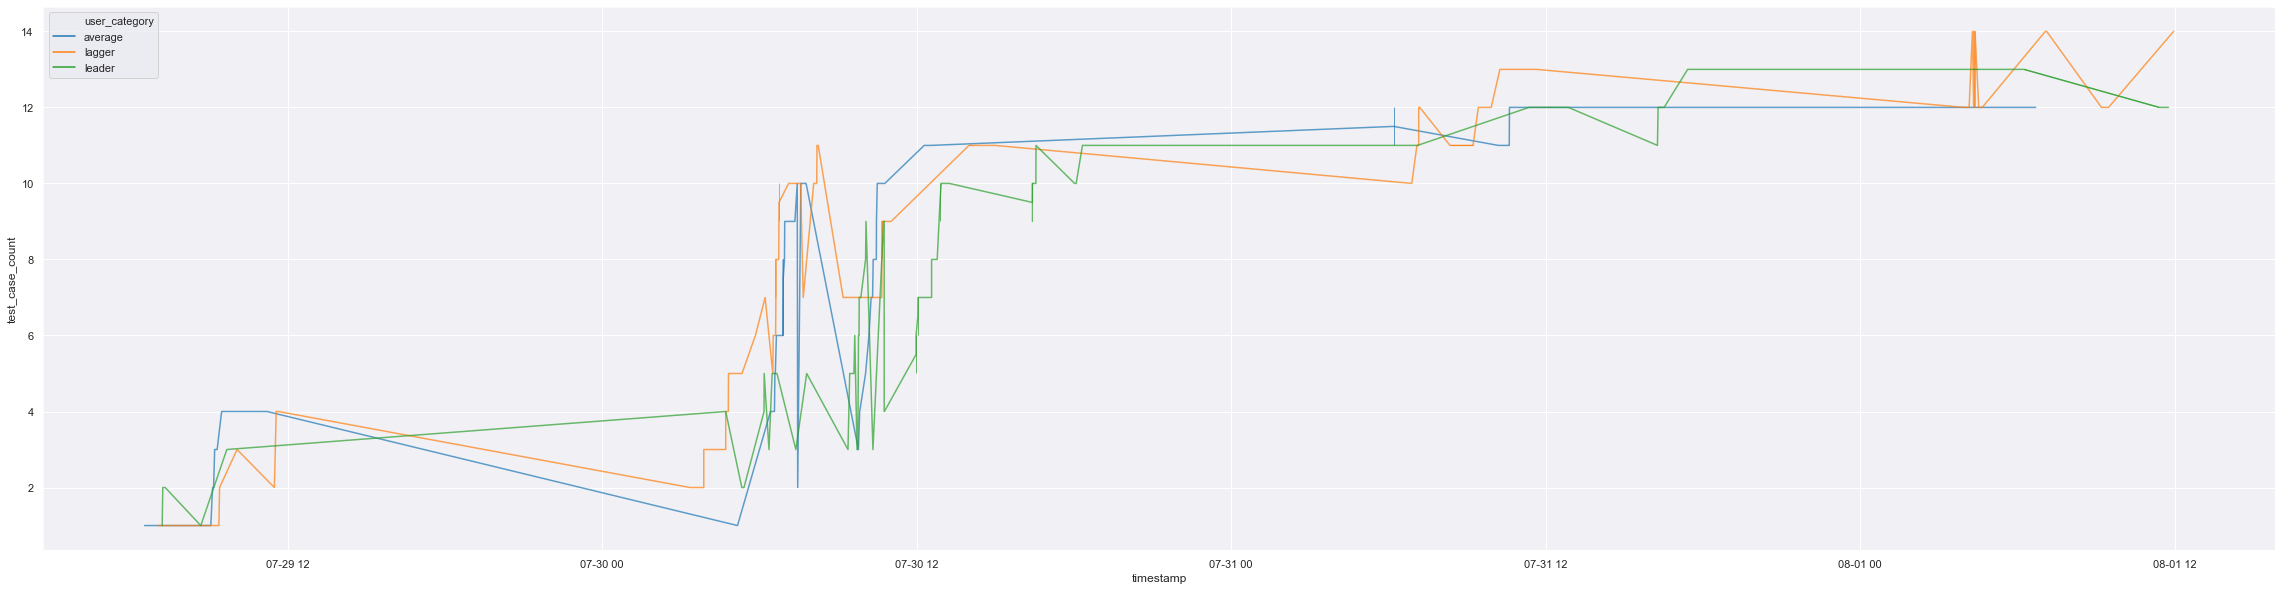

In [91]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_style("darkgrid")

f, ax = plt.subplots(figsize=(40, 10))

# plt.axvline(pd.Timestamp('2019-07-30'),color='green')

# %matplotlib inline

g = sns.lineplot(x="timestamp", y="test_case_count", hue="user_category", palette="tab10", data=user_test_case_pass)

plt.setp(ax.get_children(), alpha=.7)
# sns.lineplot(x="timestamp", y="test_case_count", hue="username", palette="tab10", data=user_test_case_pass)
plt.savefig('user-test-data.png')

